# Cleaning for english poetry dataset

The main objective is clean our dataset and generate a new one.

- Load Dataset
- Drop duplicate and NaN
- Clean noise
- Generate new dataset

### Load Dataset

In [1]:
## Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load and first look to dataset
df = pd.read_csv("../../data/EN_corpus/PoetryFoundationData.csv")

df.head()


,Unnamed: 0,Title,Poem,Poet,Tags
0,0,\r\r\n Objects Used to Prop...,"\r\r\nDog bone, stapler,\r\r\ncribbage board, ...",Michelle Menting,NaN
1,1,\r\r\n The New Church\r\r\n...,"\r\r\nThe old cupola glinted above the clouds,...",Lucia Cherciu,NaN
2,2,\r\r\n Look for Me\r\r\n ...,\r\r\nLook for me under the hood\r\r\nof that ...,Ted Kooser,NaN
3,3,\r\r\n Wild Life\r\r\n ...,"\r\r\nBehind the silo, the Mother Rabbit\r\r\n...",Grace Cavalieri,NaN
4,4,\r\r\n Umbrella\r\r\n ...,\r\r\nWhen I push your button\r\r\nyou fly off...,Connie Wanek,NaN


In [4]:
df['Poem'].duplicated().sum() ## Duplicated poems

100

In [5]:
df=df.drop_duplicates(subset=['Poem']) ## We drop where poems are the same, titles and authors could be repeted
df=df.dropna(subset=['Title'])

In [6]:
df.describe()

,Unnamed: 0
count,13754.000000
mean,93.380180
std,57.386417
min,0.000000
25%,43.000000
50%,92.000000
75%,143.000000
max,199.000000


In [7]:
df['Poem'].duplicated().sum() ## Duplicated poems cleaned

0

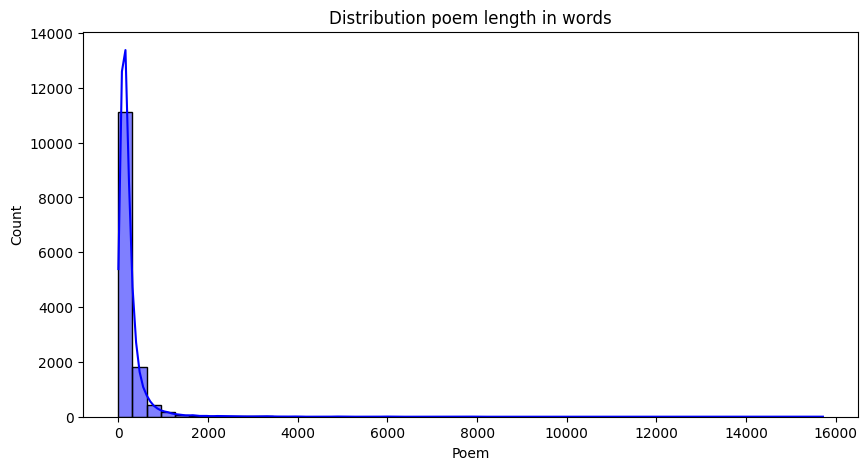

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(df["Poem"].apply(lambda x: len(x.split())), bins=50, kde=True, color='blue')
plt.title('Distribution poem length in words')
plt.show()

In [9]:
## As we saw we must drop very long and very short poems in order to avoid noise

df = df[df['Poem'].apply(lambda x: len(x.split()) <= 600)]
df

,Unnamed: 0,Title,Poem,Poet,Tags
0,0,\r\r\n Objects Used to Prop...,"\r\r\nDog bone, stapler,\r\r\ncribbage board, ...",Michelle Menting,NaN
1,1,\r\r\n The New Church\r\r\n...,"\r\r\nThe old cupola glinted above the clouds,...",Lucia Cherciu,NaN
2,2,\r\r\n Look for Me\r\r\n ...,\r\r\nLook for me under the hood\r\r\nof that ...,Ted Kooser,NaN
3,3,\r\r\n Wild Life\r\r\n ...,"\r\r\nBehind the silo, the Mother Rabbit\r\r\n...",Grace Cavalieri,NaN
4,4,\r\r\n Umbrella\r\r\n ...,\r\r\nWhen I push your button\r\r\nyou fly off...,Connie Wanek,NaN
...,...,...,...,...,...
13824,10,\r\r\n The Guru\r\r\n ...,\r\r\nHere comes the wise man in the story of ...,A. F. Moritz,"Religion,Arts & Sciences,Humor & Satire,Social..."
13825,11,\r\r\n Poem of Disconnected...,\r\r\nAt Robben Island the political prisoners...,Robert Pinsky,"Religion,Other Religions,The Spiritual,Arts & ..."
13831,0,\r\r\n The Bean Eaters\r\r\...,"\r\r\nThey eat beans mostly, this old yellow p...",Gwendolyn Brooks,"Living,Growing Old,Marriage & Companionship,Re..."
13832,1,\r\r\n The Spider\r\r\n ...,\r\r\nI \r\r\nThe spider expects the cold of w...,Richard Eberhart,"Nature,Animals,Seas, Rivers, & Streams,Summer,..."


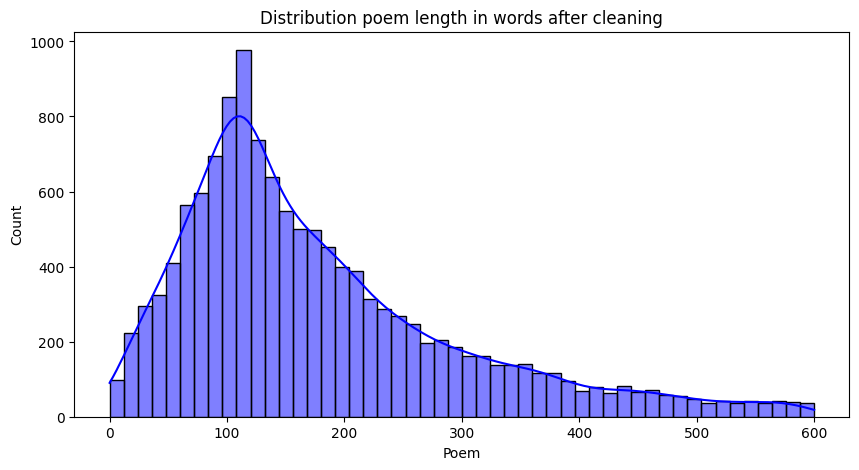

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(df["Poem"].apply(lambda x: len(x.split())), bins=50, kde=True, color='blue')
plt.title('Distribution poem length in words after cleaning')
plt.show()

In [11]:
## Save dataset cleaned

df.to_csv("../../data/ES_corpus/EN_poetry_cleaned.csv")